# Исследование данных о российском кинопрокате



    
    Необходимо провести исследование данных о российском кинопрокате. Заказчик исследования — Министерство культуры Российской Федерации. 
    В нашем распоряжении данные, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
    В ходе исследования мы изучим рынок российского кинопроката и выявим текущие тренды. Отдельно проанализируем данные по фильмам, которые получили государственную поддержку и попробуем ответить на вопрос, насколько такие фильмы интересны зрителю 
    файлы с данными 
    /datasets/mkrf_movies.csv — данные о прокатных удостоверениях. 
    /datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. 
        


## Чтение данных



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

movie = pd.read_csv('/datasets/mkrf_movies.csv')
show = pd.read_csv('/datasets/mkrf_shows.csv')


In [2]:

movie['puNumber'] = movie['puNumber'].replace(['нет'], '0', regex=True)
movie['puNumber'] = movie['puNumber'].astype(int)

data = movie.merge(show, on='puNumber', how='left') 

display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN



 изучены данные о прокатных удостоверениях и о прокате в российских кинотеатрах после чего объединены в единый фрейм
итоговый дата фрем содержит информацию: наименование, № прокатноо удостоверения, дату выхода в прокат, киностудия, продюсер и режисер, возратная категория, сумму возвратной и невозвратной гос.поддержки, бюджет фильма, иточник гос.финансирования, рейтинг, жанр, кассовые сборы. При первичной проверке видно, что в столбцах сумма возвратной и невозвратной гос.поддержки, бюджет фильма, кассовые сборы отсутствуют данные. Необходимо более полно изучить пропуски во всем дата фрейме 




## Предобработка данных

### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [4]:
data['ratings'] = data['ratings'].replace(['%'], '', regex=True)
data['ratings'] = data['ratings'].astype(float)
def r_new(row):
    ratings = row['ratings']
    if ratings < 10:
        return ratings*10

data['ratings'] = data.apply(r_new, axis=1)
data['ratings'] = data['ratings']/10
#пропуск в рейтинге nan заменим на 0
data['ratings'] = data['ratings'].fillna(0)
print(data['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 0.  8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2 4.7
 4.9 3.9 2.7 3.3 2.9 3.7 1.4 3.1 3.5 3.2 2.8 1.5 2.1 2.5 9.2 3.4 1.1 3.6
 1.  1.3 1.9 1.8 1.2 1.7 9.  8.9 9.1]


преобразованы значения только в столбце ratings в формат float с предварительным преобразованием %%

In [5]:
data['nonrefundable_support'] =(data['nonrefundable_support']/1000/1000).round(0)
data['refundable_support'] = (data['refundable_support']/1000/1000).round(0)
data['budget']=(data['budget']/1000/1000).round(0)
data['box_office']=(data['box_office']/1000/1000).round(0)

data['show_start_date'] = pd.to_datetime(

data['show_start_date'], format='%Y-%m-%dT%H:%M:%S' 
)



 Столбец show_start_date преобразован в формат даты.


In [9]:

print(data.info())

data.head(3)

NameError: name 'data' is not defined

###  Пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [7]:
data.isna().sum()
#data['box_office'].unique()


title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                    976
box_office               4328
dtype: int64

заменим пропуски в категориях film_studio, production_country, producer на unknown, genres, director т.к. не моежем установить истинных данных а пропуски могут помешать дольнейшей работе с данными

In [8]:
data[['film_studio', 'production_country', 'producer', 'director', 'genres']] = data[['film_studio', 'production_country', 'producer', 'director', 'genres']].fillna('unknown')

In [9]:
#data['film_studio'] = data['film_studio'].fillna('unknown')
#data['production_country'] = data['production_country'].fillna('unknown')
#data['producer'] = data['producer'].fillna('unknown')
#data['director'] = data['director'].fillna('unknown')
#data['genres'] = data['genres'].fillna('unknown')

data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                      0
box_office               4328
dtype: int64

для одновременного заполнения пропусков в столбцах с однинаковыми форматами на единое занчение 'unknown' использована другая кострукция

### Дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [10]:
data.duplicated().sum()

0

In [11]:
display(data['puNumber'].duplicated().sum())

2

In [12]:
display(data[data.duplicated(['puNumber'], keep=False)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.000,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.400,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


в столбце puNumber имеются дубликаты, но при детельном рассмотрении что фильмы разные. Возможно произошла ошибка при внесении данных в базу. Удалять позиции с точки зрения дубликатов но номеру прокатного удостоверения некорректно

In [13]:
display(data['title'].duplicated().sum())

714

In [14]:
sorted(data['title'])

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

в категории title имеются явные дубликаты. возможно фильмы были внесены в список неколько раз ошибочно. На пример '10 лет спустя', 'Аватар_', 'Агент Джонни Инглиш: Перезагрузка' и т.д.
удалим их
ВАЖНО дополнительное условие: фильмы с одинаковыми названиями но разными данными не подлежат удалению

In [15]:
#data = data.drop_duplicates(subset=['title'], keep='first')

data = data[~(
   (data['refundable_support'].isna()) &
   (data['nonrefundable_support'].isna()) &
   (data['budget'].isna()) &
   (data['box_office'].isna()) &
   (data.duplicated('title'))
)]
data['title'].duplicated().sum()

142

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6914 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6914 non-null   object             
 1   puNumber               6914 non-null   int64              
 2   show_start_date        6914 non-null   datetime64[ns, UTC]
 3   type                   6914 non-null   object             
 4   film_studio            6914 non-null   object             
 5   production_country     6914 non-null   object             
 6   director               6914 non-null   object             
 7   producer               6914 non-null   object             
 8   age_restriction        6914 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

в столбце puNumber имеются дубликаты, но при детельном рассмотрении видно,что фильмы разные. Возможно произошла ошибка при внесении данных в базу. Удалять позиции с точки зрения дубликатов но номеру прокатного удостоверения некорректно. Выведны наименования с сортировкой в которой видно дубликаты. Приведены примеры дубликатов фильмов по названиям, комментраий дополнен


### Категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.


In [17]:

data['type'] = data['type'].str.strip()
print(data['type'].unique())
data.info()

NameError: name 'data' is not defined

в столбце type обнаружены неявые дубликаты (П:' Художественный' и 'Художественный'), переименуем в единый формат с применение метода data['type'].str.strip() без лишних пробелов

In [18]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [19]:
data['production_country'] = data['production_country'].replace(['СССР     ', 'СССР  ', ' СССР','СССР '], 'СССР', regex=True)
data['production_country'] = data['production_country'].replace([' - ', ', '], '-', regex=True)
data['production_country'] = data['production_country'].replace(['2019-Канада'], 'Канада', regex=True)
data['production_country'] = data['production_country'].replace(['Сша', 'СЩА', 'США ', 'CША'], 'США', regex=True)
data['production_country'] = data['production_country'].replace(['2019'], 'Канада', regex=True)
data['production_country'] = data['production_country'].replace(['Франция '], 'Франция', regex=True)
data['production_country'] = data['production_country'].replace(['Иран '], 'Иран', regex=True)
data['production_country'] = data['production_country'].replace(['Великобритания '], 'Великобритания', regex=True)
data['production_country'] = data['production_country'].replace(['Италия '], 'Италия', regex=True)
data['production_country'] = data['production_country'].replace(['СССР '], 'СССР', regex=True)


In [20]:
data['production_country'] = data['production_country'].replace(['2019'], 'unknown', regex=True)
data['main_country'] = data['production_country'].apply(lambda x: x.split('-')[0])
print(data['main_country'].unique())

['США' 'СССР' 'Франция' 'Германия' 'Великобритания' 'Чехословакия'
 'Новая Зеландия' 'Канада' 'Россия' 'Гонконг' 'Ирландия' 'Чехия'
 'Люксембург' 'Япония' 'Аргентина' 'Дания' 'Австрия' 'Италия' 'КНР'
 'Швеция' 'Испания' 'Мексика' 'Бразилия' 'Чили' 'Австралия' 'Португалия'
 'Исландия' 'Южная Корея' 'Бельгия' 'Украина' 'Босния и Герцеговина'
 'Норвегия' 'Швейцария' 'Греция' 'Норвения' 'Грузия' 'Финляндия' 'Израиль'
 'Иран' 'Нидерланды' 'Республика Узбекистан' 'Турция' 'Сербия' 'Киргизия'
 'Индия' 'Польша' 'Армения' 'ЮАР' 'Республика Беларусь' 'Румыния'
 'Болгария' 'Индонезия' 'Таиланд' 'Малайзия' 'Азербайджан' 'Парагвай'
 'Уругвай' 'Хорватия' 'Венгрия' 'Эстония' 'Венесуэла' 'Македония'
 'Республика Кипр' 'Перу' 'Китай' 'unknown' 'Княжество Андорра'
 'Республика Казахстан' 'ОАЭ' 'Корея' 'Голландия' 'Литва' 'Латвия'
 'Казахстан' 'Республика Корея' 'Монголия' 'Сингапур' 'Ливан' 'Кения'
 'Колумбия' 'Республика Армения' 'Пуэрто' 'Пакистан']


обнаруженные неявнц дебуликаты в наименовании страны. основные причины - нет единообразия, лишние пробелы, ошибки ('Сша' или 'Сща' или 'США  ' вместо 'США') 

In [21]:
data['age_restriction'] = data['age_restriction'].str[:5]
data['age_restriction'] = data['age_restriction'].replace(['«', '»'], '', regex=True)
data['age_restriction'] = data['age_restriction'].str.strip()
print(data['age_restriction'])

0       18+
1        6+
2       18+
5        6+
6       12+
       ... 
7481    12+
7482    16+
7483     0+
7484     0+
7485     0+
Name: age_restriction, Length: 6914, dtype: object


основные причины появления неявных дубликатов - нет единообразия ( ',' вместо '-'), лишние пробелы, ошибки в написании ('Сша' или 'Сща' или 'США  ' вместо 'США')

### Количественные значения
Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?


In [22]:
data_b = data.iloc [:, [9,10,11]]
print(data_b.sort_values('budget').head(30))


      refundable_support  nonrefundable_support  budget
3565               0.000                250.000   0.000
3675              20.000                 20.000   0.000
6323               0.000                139.000   0.000
2532              20.000                  0.000   0.000
2058               0.000                 75.000   0.000
2053               0.000                 23.000   0.000
3739              25.000                 20.000   0.000
5806              10.000                 60.000   0.000
2684               0.000                 59.000   0.000
3047              19.000                 51.000   0.000
2874               0.000                  6.000   0.000
5673              20.000                 40.000   0.000
2615              60.000                100.000   0.000
2788               0.000                 35.000   0.000
2472              10.000                 70.000   0.000
6008              40.000                 40.000   0.000
6823              60.000                120.000 

в ряде случаев вывлено отсутствие данных в столбце ['budget'] при наличии данных в столбцах refundable_support, nonrefundable_support. Это ошибка. Необходимо ее устранить.

In [23]:
data['budget'].describe()

count    332.000
mean     127.202
std      188.587
min        0.000
25%       42.000
50%       68.500
75%      142.000
max     2305.000
Name: budget, dtype: float64

In [24]:
data.loc[
        (data['budget'] < data['nonrefundable_support']) |
        (data['budget'] < data['refundable_support']) |
        (data['budget'] < data['nonrefundable_support'] + data['refundable_support']) |
        (data['budget'].isna()),
        'budget'
    ] = data['nonrefundable_support'] + data['refundable_support']


In [25]:
data['refundable_support'].describe()

count   332.000
mean     11.864
std      24.916
min       0.000
25%       0.000
50%       0.000
75%      15.000
max     180.000
Name: refundable_support, dtype: float64

In [26]:
data['nonrefundable_support'].describe()

count   332.000
mean     48.982
std      59.980
min       0.000
25%      25.000
50%      30.000
75%      40.500
max     400.000
Name: nonrefundable_support, dtype: float64

In [27]:
data['budget'].describe()

count    332.000
mean     131.395
std      187.147
min        6.000
25%       45.750
50%       71.500
75%      150.000
max     2305.000
Name: budget, dtype: float64

в категории ['budget'] пропуски, 0 и значения меньше суммы возвратной и невозвратной гос поддержки заменены по итогу на сумму возвратной и невозвратной гос поддержки т.к. является явным условием для данной категории

### Новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [28]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year
#print(data.head())

In [30]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       6582
nonrefundable_support    6582
budget                   6582
financing_source         6582
ratings                     0
genres                      0
box_office               3756
main_country                0
year                        0
dtype: int64

In [32]:
data['main_genre'] = data['genres'].apply(lambda x: x.split(',')[0])


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [33]:
data['support'] = data['refundable_support']+data['nonrefundable_support']
data['dol_support'] = data['support']/data['budget']
dol = data['support'].sum()/data['budget'].sum()
print(dol)
print(data.query('budget > 0').tail())

0.4630814020126997
                            title   puNumber           show_start_date  \
7464                Союз спасения  111022019 2019-12-26 12:00:00+00:00   
7466  Иван Царевич и Серый Волк 4  114005019 2019-12-20 12:00:00+00:00   
7474                    Вторжение  111022519 2019-12-23 12:00:00+00:00   
7476                   Я свободен  111023019 2019-12-26 12:00:00+00:00   
7478        (Не)идеальный мужчина  111023119 2019-12-24 12:00:00+00:00   

                type                                   film_studio  \
7464  Художественный                           ЗАО "Дирекция кино"   
7466    Анимационный     ООО "Студия анимационного кино "Мельница"   
7474  Художественный  ООО "Арт Пикчерс Студия", ООО "Водород 2011"   
7476  Художественный           АО "ТПО "Киностудия им. М.Горького"   
7478  Художественный                      ООО "Нон-Стоп Продакшн"    

     production_country                            director  \
7464             Россия                           А.

Доля государственной поддержки от общего бюджета фильма составляет 46,3% 

In [76]:

data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,box_office,main_country,year,main_genre,main_director,support,dol_support,dol_nonrefundable,dol_refundable,dol_box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.000,...,0.000,США,2015,боевик,Кевин Костнер,NaN,NaN,NaN,NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6+,0.000,...,0.000,СССР,2016,драма,Е.Матвеев,NaN,NaN,NaN,NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.000,...,0.000,США,2016,фантастика,Тимур Бекмамбетов,NaN,NaN,NaN,NaN,NaN



На экран выведены только позиции по кторым есть данные по бюджету, иначе расчетный покаталель доли мы не увидим по отдельным ыильма где бюджет отсутствует

В ходе предобработки данных было проведно:
- для объединения масибов mkrf_movies и mkrf_shows значение 'нет' в столбце ['puNumber'] заменено но 0 и преобразуем данные столбца ['puNumber'] в int
- в столбце ['ratings'] показатели приведены к единому формату
- заменены пропуски в категориях film_studio, production_country, producer, genres, director на unknown,  т.к. не возможности установить истинные данне
- явные дубликаты не обнаружены
- в категории ['title'] обнаружены и устранены дубликаты неявные буликаты (фильмы с одинаковыми названиями но разными данными по бюджетам и вохвратной/невозвратной гос.поддержке оставлены)
- устранены невялные дубликаты в категории ['type'] - однинаковые типы но, написанные содержащие лишние пробелы
- для лучшего восприятия переименованы возрастные категории в столбце ['age_restriction']
- в категории ['budget'] пропуски, 0 и значения меньше суммы возвратной и невозвратной гос поддержки заменены по итогу на сумму возвратной и невозвратной гос поддержки т.к. является явным условием для данной категории
- преобразованы данные ['show_start_date'] в формат времени %Y-%m-%dT%H:%M:%S и созданы новый столбец с годом выхода в прокат
- соозданы новые столбцы с основным(главным) жанром и директором фильма
- рассчитана доля фильмов с гос.поддрежкой, которая составляет 46,3 %

Пропуски, явные и неявные дубликаты, отсутствие данных или 0 в значениях мгогут быть как ошибкой при внесении данных со стороны пользователя, так и сбой при выгрузке данных (на пример для категории ['budget'])


## Исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Text(0, 0.5, 'количество фильмов')

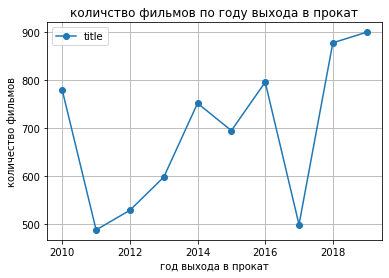

In [34]:

#print(data.pivot_table(index='year', values='title', aggfunc = 'count'))
data.pivot_table(index='year', values='title', aggfunc = 'count').plot(grid=True, style = '-o', figsize=(6, 4))
plt.title('количство фильмов по году выхода в прокат')
plt.xlabel('год выхода в прокат')
plt.ylabel('количество фильмов')


с начала наблюдений 2010г количество вышедших фильмов по годам меняется нелинейно. минимальное количество в 2011 - 488 далее рост до 2014г до уровня 752 фильма с падением в 2015 до 695 фильмов и снова рост в 2016г на уровень 796 фишьмов. В 2017г резкое падение до 499 что близко к минимальному значению 2011г. Далее наблюдается резкий рост и до максимального за наблюдаемый период количество фильмов 900 в 2019г.

      box_office  title  ratio
year                          
2010         105    779  0.135
2011         109    488  0.223
2012         128    529  0.242
2013         184    598  0.308
2014         279    752  0.371
2015         465    695  0.669
2016         526    796  0.661
2017         357    499  0.715
2018         475    878  0.541
2019         530    900  0.589


Text(0, 0.5, 'доля')

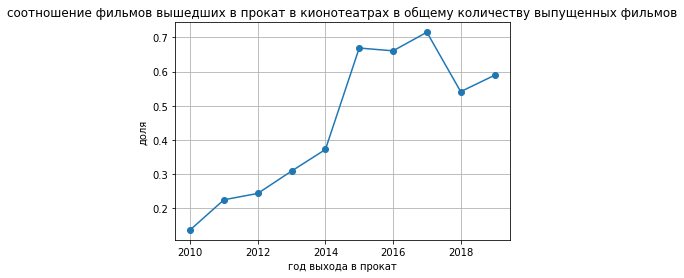

In [35]:
data_count= data.pivot_table(index='year', values=('title', 'box_office'), aggfunc = 'count')
#index='year', columns='age_restriction', values='box_office_mln', aggfunc = 'sum'
data_count['ratio'] = (data_count['box_office']/data_count['title'])
print(data_count)
data_count['ratio'].plot(grid=True, style = '-o', figsize=(6, 4))
plt.title('соотношение фильмов вышедших в прокат в кионотеатрах в общему количеству выпущенных фильмов')
plt.xlabel('год выхода в прокат')
plt.ylabel('доля')

доля вышедших в прокат в кинотеатрах в сопоставлении с общим количеством выпущенных фильмов по годам с начала наблюдения имеет тенденцию к увеличению в (с небольшим снижением в 2016 до 66,1%) достигая своего максимума в 2017г до 71,5% а уже в 2018 доля снижается до 54,1% и 58,9% в 2019. Это может быть связано с изменением каналов получения контента пользователями и перехода в другие форматы отличные от кинотеатров.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Text(0, 0.5, 'кассовые сборы')

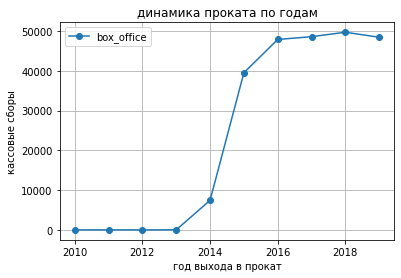

In [36]:
data.pivot_table(index='year', values='box_office', aggfunc = 'sum').plot(grid=True, style = '-o', figsize=(6, 4))
data.pivot_table(index='year', values='box_office', aggfunc = 'sum').describe()
plt.title('динамика проката по годам')
plt.xlabel('год выхода в прокат')
plt.ylabel('кассовые сборы')

In [37]:
data.pivot_table(index='year', values='box_office', aggfunc = 'sum')

,box_office
year,
2010,1.000
2011,13.000
2012,4.000
2013,26.000
2014,7434.000
2015,39489.000
2016,47858.000
2017,48556.000
2018,49672.000


In [38]:
data.pivot_table(index='year', values='box_office', aggfunc = 'sum').describe()


,box_office
count,10.000
mean,24147.200
std,24137.463
min,1.000
25%,16.250
50%,23461.500
75%,48278.750
max,49672.000


судя по графику кассовых сборов по годам выхода в прокат до 2018 наблюдается рост кассовх сборв, после чего в 2019 небольшое снижение. Максимальная величина становилась на уровне почти 50 000 млн, а минимальное 2,4 млн

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [39]:

mean_box = data.pivot_table(index='year', values='box_office', aggfunc = 'mean')
print(mean_box)

      box_office
year            
2010       0.010
2011       0.119
2012       0.031
2013       0.141
2014      26.645
2015      84.923
2016      90.985
2017     136.011
2018     104.573
2019      91.357


показатель средних сборов по годам показывает рост до 2017г до 136 млн. а далее сниежение. Показатели сборов в период с 2010 по 2013 выглядят подозрительно малыми. Даже если предположить что индустрия находилаь в застое нет причин для резкого роста с 2013 по 2014 в 26 раз.

      box_office
year            
2010       0.000
2011       0.000
2012       0.000
2013       0.000
2014       0.000
2015       5.000
2016       4.000
2017      10.000
2018       9.000
2019       5.000


<AxesSubplot:xlabel='year'>

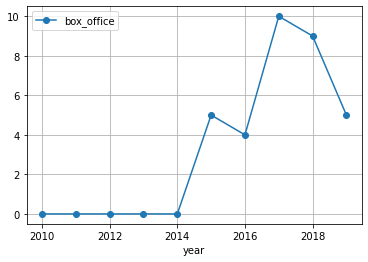

In [40]:
median_box = data.pivot_table(index='year', values='box_office', aggfunc = 'median')
print(median_box)
median_box.plot(grid=True, style = '-o', figsize=(6, 4))

медианное значени сборов по годам аналогично среднему показывает наибольшую величину в 2017 и далее спад до уровня ниже 2015 с тем отличием что в 2016г был спад от 2015 и потом резкий рост.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [41]:
box_age = data.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc = 'sum', margins=True,
    margins_name='Total')
box_age


age_restriction,0+,12+,16+,18+,6+,Total
year,,,,,,
2010,1.000,0.000,0.000,0.000,NaN,1.000
2011,13.000,0.000,0.000,0.000,0.000,13.000
2012,1.000,0.000,2.000,0.000,1.000,4.000
2013,1.000,20.000,0.000,5.000,0.000,26.000
2014,372.000,2581.000,542.000,2209.000,1730.000,7434.000
2015,379.000,13616.000,11359.000,5435.000,8700.000,39489.000
2016,149.000,12204.000,16661.000,6794.000,12050.000,47858.000
2017,229.000,7850.000,18742.000,9651.000,12084.000,48556.000
2018,32.000,14269.000,16502.000,8764.000,10105.000,49672.000


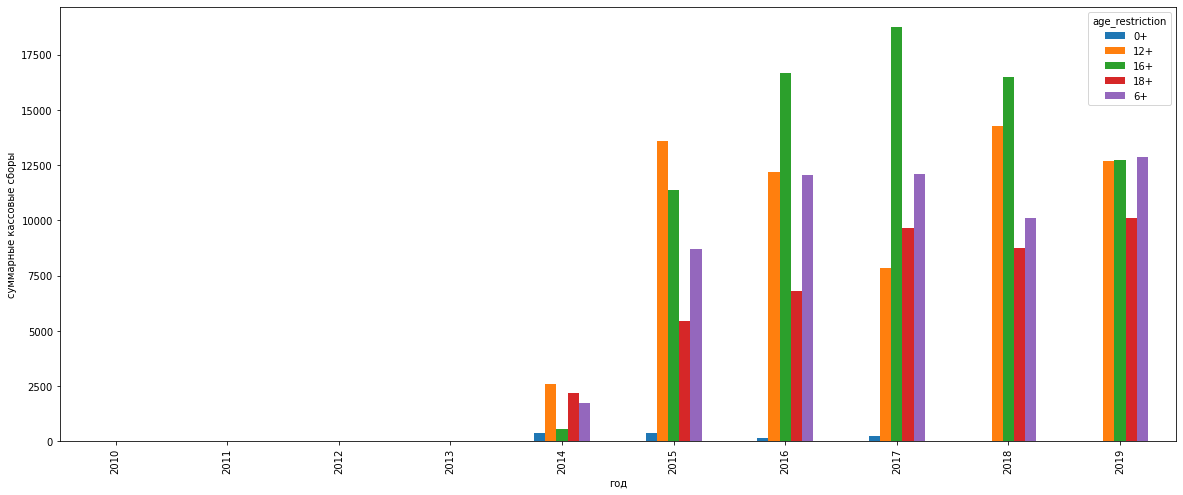

In [42]:
data.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc = 'sum').plot(y=['0+','12+','16+','18+','6+'], kind='bar', figsize=(20,8))
plt.ylabel('суммарные кассовые сборы в возратных категориях по годам')
plt.xlabel('год')
plt.ylabel('суммарные кассовые сборы')
plt.show()

в возрастных категориях фильмов наибольшие совокупные кассовые сборы в категории 16+, по годам максимальные суммарные сборы отмечены в 2018г 
Если смотреть разрезе категорий, то наибольшие сборы были в категории 16+ в 2017


для удобства работы с данными по кассовым сбора создан новый столбец с переводом данных в млн
Проведен исследовательский анализ данных в ходе которого пулчены следующие результаты 
-  с начала наблюдений 2010г количество вышедших фильмов по годам меняется нелинейно. минимальное количество в 2011 - 488 далее рост до 2014г до уровня 752 фильма с падением в 2015 до 695 фильмов и снова рост в 2016г на уровень 796 фишьмов. В 2017г резкое падение до 499 что близко к минимальному значению 2011г. Далее наблюдается резкий рост и до максимального за наблюдаемый период количество фильмов 900 в 2019г.
- доля вышедших в прокат в кинотеатрах в сопоставлении с общим количеством выпущенных фильмов по годам с начала наблюдения имеет тенденцию к увеличению в (с небольшим снижением в 2016 до 66,1%) достигая своего максимума в 2017г до 71,5% а уже в 2018 доля снижается до 54,1% и 58,9% в 2019. Это может быть связано с изменением каналов получения контента пользователями и перехода в другие форматы отличные от кинотеатров.
- судя по графику кассовых сборов по годам выхода в прокат до 2018 наблюдается рост кассовх сборв, после чего в 2019 небольшое снижение. Максимальная величина становилась на уровне почти 50 000 млн, а минимальное 2,4 млн
- показатель средних сборов по годам показывает рост до 2017г до 136 млн. а далее сниежение
- медианное значени сборов по годам аналогично среднему показывает наибольшую величину в 2017 и далее спад до уровня ниже 2015 с тем отличием что в 2016г был спад от 2015 и потом резкий рост.
- медианное значени сборов по годам аналогично среднему показывает наибольшую величину в 2017 и далее спад до уровня ниже 2015 с тем отличием что в 2016г был спад от 2015 и потом резкий рост.
- в возрастных категориях фильмов наибольшие кассовые сборы в категории 16+, по годам максимальные сборы отмечены в 2018г

## Фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [44]:

data['dol_nonrefundable'] = data['nonrefundable_support']/data['budget']
data['dol_refundable'] = data['refundable_support']/data['budget'] 
data['dol_box_office'] = data['box_office']/data['budget'] 

print(data.pivot_table(index='year'))


      box_office  budget  dol_box_office  dol_nonrefundable  dol_refundable  \
year                                                                          
2010       0.010     NaN             NaN                NaN             NaN   
2011       0.119     NaN             NaN                NaN             NaN   
2012       0.031     NaN             NaN                NaN             NaN   
2013       0.141 127.500           0.057              0.471           0.000   
2014      26.645  81.312           0.616              0.513           0.038   
2015      84.923  89.930           0.621              0.484           0.078   
2016      90.985 123.803           0.696              0.490           0.085   
2017     136.011 172.073           1.034              0.405           0.101   
2018     104.573 125.018           1.161              0.465           0.080   
2019      91.357 181.786           0.879              0.451           0.057   

      dol_support  nonrefundable_support      puNum

в сгрупированной по годам таблице видно:
    - отсутствют данные о бюджетах и господдержке с 2010-2012гг.
    - очень малые кассовые сборы в период 2010-2013 при том, что в 2013 средний бюджет несопостовимо больше средних кассовых сборов в этом же году
    - подозрительно низкий средний ретинг


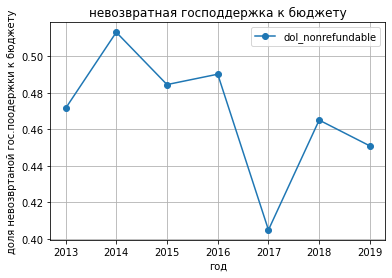

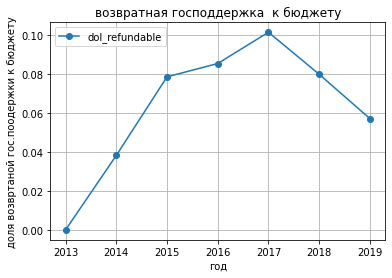

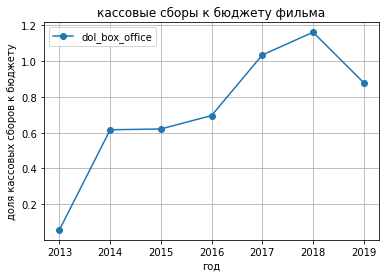

In [45]:
data.query('budget >0').pivot_table(index='year', aggfunc = 'mean').plot(y = 'dol_nonrefundable', title = 'невозвратная господдержка к бюджету', grid=True, style = '-o', figsize=(6, 4))
plt.xlabel('год')
plt.ylabel('доля невозвртаной гос.поодержки к бюджету')
plt.show()

data.query('budget >0').pivot_table(index='year', aggfunc = 'mean').plot(y = 'dol_refundable', title = 'возвратная господдержка  к бюджету', grid=True, style = '-o', figsize=(6, 4))
plt.xlabel('год')
plt.ylabel('доля возвртаной гос.поодержки к бюджету')
plt.show()

data.query('budget >0').pivot_table(index='year', aggfunc = 'mean').plot(y = 'dol_box_office', title = 'кассовые сборы к бюджету фильма', grid=True, style = '-o', figsize=(6, 4))
plt.xlabel('год')
plt.ylabel('доля кассовых сборов к бюджету')
plt.show()

сводная таблица по годам с бюджетом больше 0. %%невозвратной господдержки - общий тренд к снижению с незначительным ростом в 2016 и 2018гг. %% возвратной гос.поддержки к бюджету расчтет до 2016г и достигает своего максмального значения в 12,2%, а далее наметился тренд к снижению. Наибольшие кассовые сборы наблюдаются в 2017г В этом же году зафиксировано превышение кассовых сборов на бюджетом в 1,6 раза, но далее в таже наблюдается снижение, а в 2019г. вновь кассовые сборы становятся ниже затраченного бюджета. При всем при этом средние показатели рейтинга по всем годам за исключением 2015г составляют 0, что говорит о том что либо фильмы не оценвались либо это может быть связано с ошибкой в данных.

In [46]:
data_gos = data.query('budget > 0').sort_values('dol_box_office', ascending=False)
data_gos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 7456 to 7478
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

всего в выборке имеется 332 фильма с гос поддрежкой

In [47]:
#data_gos['dol_box_office'] = data_gos['dol_box_office'].fillna(0)
len(data_gos.query('dol_box_office >=1.0'))

79

в выборке из 332 фильмов с гос.поддержкой только 79 фильмов получили кассовые сборы покрывающие бюджет фильма 

In [48]:
data_gos_budget = data_gos.pivot_table(index='year', values='budget', aggfunc = ('count','sum'))
data_gos_budget['mean'] = (data_gos_budget['sum']/data_gos_budget['count']).round(0)
print(data_gos_budget)

      count       sum    mean
year                         
2013      2   255.000 128.000
2014     16  1301.000  81.000
2015     86  7734.000  90.000
2016     61  7552.000 124.000
2017     41  7055.000 172.000
2018     56  7001.000 125.000
2019     70 12725.000 182.000


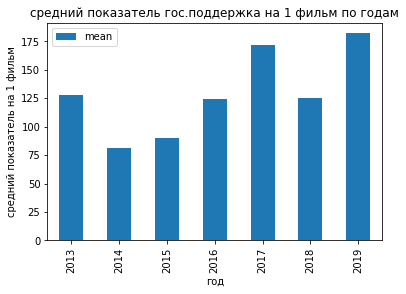

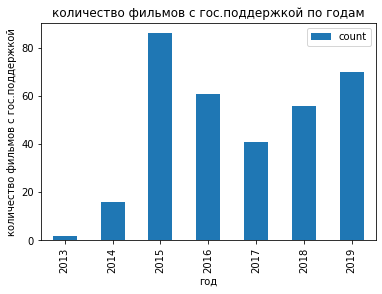

In [49]:
data_gos_budget.plot(y = 'mean' ,kind='bar')
plt.title('средний показатель гос.поддержка на 1 фильм по годам')
plt.xlabel('год')
plt.ylabel('средний показатель на 1 фильм')
plt.show()
data_gos_budget.plot(y = 'count' ,kind='bar')
plt.title('количество фильмов с гос.поддержкой по годам')
plt.xlabel('год')
plt.ylabel('количество фильмов с гос.поддержкой')
plt.show()

наибольшее количество профинансированное государством в 2015г - 86 фильмов. По годам количество меняется нелинейно. В среднем наибольшая сумма на фильм была в 2019г. - 182 млн, также большие суммы выделялись в 2017г - 172 млн

In [50]:
data_gos_box = data_gos.pivot_table(index='year', values='box_office', aggfunc = ('mean','sum'))
#data_gos_box['mean'] = (data_gos_box['sum']/data_gos_box['count']).round(0)
print(data_gos_box)

        mean       sum
year                  
2013  10.000    20.000
2014  63.562  1017.000
2015  68.024  5782.000
2016 101.317  6079.000
2017 278.538 10863.000
2018 177.393  9934.000
2019 140.250  8415.000


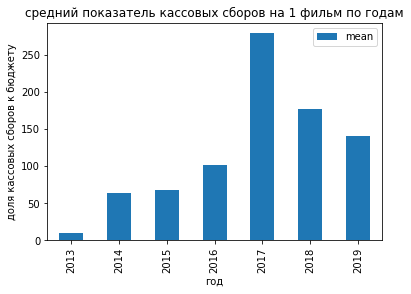

In [51]:
data_gos_box.plot(y = 'mean' ,kind='bar')
plt.title('средний показатель кассовых сборов на 1 фильм по годам')
plt.xlabel('год')
plt.ylabel('доля кассовых сборов к бюджету')
plt.show()

Средняя сумма кассовых сборов наибольшая в 2017г с суммой 265 млн на 1 фильм

      count  sum_budget  mean_budget  mean_box   sum_box  payback
year                                                             
2013      2     255.000      128.000    10.000    20.000    0.078
2014     16    1301.000       81.000    63.562  1017.000    0.782
2015     86    7734.000       90.000    68.024  5782.000    0.748
2016     61    7552.000      124.000   101.317  6079.000    0.805
2017     41    7055.000      172.000   278.538 10863.000    1.540
2018     56    7001.000      125.000   177.393  9934.000    1.419
2019     70   12725.000      182.000   140.250  8415.000    0.661


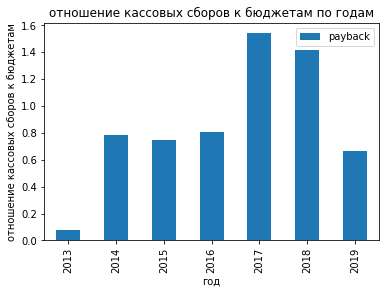

In [52]:
data_money = pd.concat([data_gos_budget,data_gos_box], axis=1) #объединили 2 тоаблицы в одну новую
data_money.columns = ['count', 'sum_budget', 'mean_budget', 'mean_box', 'sum_box'] #переименовали столбцы в нормальный вид
data_money['payback'] = data_money['sum_box']/data_money['sum_budget']
print(data_money)

data_money.plot(y = 'payback' ,kind='bar')
plt.title('отношение кассовых сборов к бюджетам по годам')
plt.xlabel('год')
plt.ylabel('отношение кассовых сборов к бюджетам')
plt.show()

кассовые сборы превышали бюджет фильмов только в 2017 и 2018гг. Во все остальные года фильмы с гос поддержкой не получали достаточных кассовых сборов для покрытия затраченых бюджетов

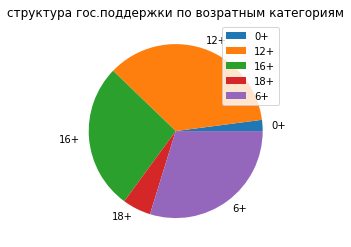

In [53]:
data_gos.pivot_table(index='age_restriction', values='budget', aggfunc = 'sum').plot(y = 'budget', kind = 'pie')
plt.title('структура гос.поддержки по возратным категориям')
plt.ylabel('')
plt.show()

наибольшая сумма гос.поддержки была направлена на фильмы в возрастной категории 12+, далее идут категории 6+ и 16+

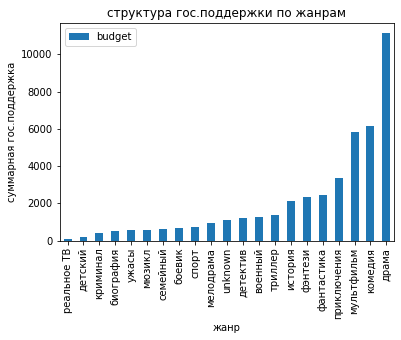

In [54]:
data_gos.pivot_table(index='main_genre', values='budget', aggfunc = 'sum').sort_values('budget', ascending=True).plot(y = 'budget', kind = 'bar')

plt.title('структура гос.поддержки по жанрам')
plt.xlabel('жанр')
plt.ylabel('суммарная гос.поддержка')
plt.show()

In [55]:
print(data_gos.pivot_table(index='main_genre', values='budget', aggfunc = 'sum').sort_values('budget', ascending=True))


               budget
main_genre           
реальное ТВ    80.000
детский       184.000
криминал      427.000
биография     529.000
ужасы         562.000
мюзикл        564.000
семейный      637.000
боевик        683.000
спорт         710.000
мелодрама     941.000
unknown      1082.000
детектив     1199.000
военный      1286.000
триллер      1352.000
история      2145.000
фэнтези      2340.000
фантастика   2442.000
приключения  3374.000
мультфильм   5815.000
комедия      6147.000
драма       11124.000


наибольшая сумма гос.поддержки была направлена на фильмы категории жанра драма, почти в 2 раза меньше направлялось на комедии и мультфильмы

In [56]:
print(data_gos.sort_values(by='dol_box_office',ascending=False).head(10))

                  title   puNumber           show_start_date            type  \
7456              Холоп  111021719 2019-12-19 12:00:00+00:00  Художественный   
5708                Лёд  111000518 2018-02-01 12:00:00+00:00  Художественный   
5749            Я худею  111001618 2018-03-07 12:00:00+00:00  Художественный   
3229      Гуляй, Вася !  111018216 2016-12-20 12:00:00+00:00  Художественный   
2058          Дуxless 2  111000415 2015-01-26 12:00:00+00:00  Художественный   
2701  Самый Лучший День  111017815 2015-10-14 12:00:00+00:00  Художественный   
2205   8 новых свиданий  111014914 2014-10-30 12:00:00+00:00  Художественный   
5641         Ёлки Новые  111011617 2017-12-21 12:00:00+00:00  Художественный   
6178        Непрощенный  111016018 2018-09-27 12:00:00+00:00  Художественный   
5653     Движение вверх  111011817 2017-12-21 12:00:00+00:00  Художественный   

                                            film_studio production_country  \
7456            ООО "МЕМ-МЕДИА" по заказу

In [57]:
print(data_gos.sort_values(by='dol_box_office',ascending=False)[['title', 'dol_box_office']].head(10))

                  title  dol_box_office
7456              Холоп          19.212
5708                Лёд           9.705
5749            Я худею           7.193
3229      Гуляй, Вася !           6.641
2058          Дуxless 2           5.947
2701  Самый Лучший День           5.214
2205   8 новых свиданий           5.104
5641         Ёлки Новые           4.914
6178        Непрощенный           4.793
5653     Движение вверх           4.712


в 10-ку фильмов окупившихся в прокате (х4,7 и болше) вошли художественные фильмы, приемущественно комедийного жанра, вышедшие в прокат в период 2014-2019гг. Холоп, Лёд, Я худею, Гуляй, Вася !, Дуxless 2, Самый Лучший День, 8 новых свиданий, Ёлки Новые, Непрощенный, Движение вверх.

In [58]:
# в категориях refundable_support, nonrefundable_support, financing_source заменм на 0, т.к. скорее всег из-за отсутствия данных съемки были на частные средства и государство не участвовало. Пропуски в категории budget и box_office заменим на 0, т.к. без детального исследования каждой позиции и использования дополнительных источниов данных установить бюджет и сборы в рубля фильма не представляется возможным. Эта гипотизе также применима к указанным выше категоириям

# возможно потрубуется убрать замену на 0, т.к. это может привести к некорректным выводам
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
#data['financing_source'] = data['financing_source'].fillna(0)
data['budget'] = data['budget'].fillna(0)
data['box_office'] = data['box_office'].fillna(0)
#data.isna().sum()

In [59]:
data.query('ratings >=0.0').pivot_table(index='year', aggfunc = 'mean')

,box_office,budget,dol_box_office,dol_nonrefundable,dol_refundable,dol_support,nonrefundable_support,puNumber,ratings,refundable_support,support
year,,,,,,,,,,,
2010,0.001,0.000,NaN,NaN,NaN,NaN,0.000,169396884.813,6.052,0.000,NaN
2011,0.027,0.000,NaN,NaN,NaN,NaN,0.000,137701788.443,5.828,0.000,NaN
2012,0.008,0.000,NaN,NaN,NaN,NaN,0.000,129248366.198,5.929,0.000,NaN
2013,0.043,0.426,0.057,0.471,0.000,0.471,0.224,124604812.294,5.992,0.000,67.000
2014,9.886,1.730,0.616,0.513,0.038,0.551,0.666,128256968.223,5.963,0.094,35.750
2015,56.819,11.128,0.621,0.484,0.078,0.563,4.345,132008604.553,5.486,0.917,42.523
2016,60.123,9.487,0.696,0.490,0.085,0.575,4.249,131227935.980,5.495,1.158,70.557
2017,97.307,14.138,1.034,0.405,0.101,0.506,4.938,120446349.066,5.414,1.441,77.634
2018,56.574,7.974,1.161,0.465,0.080,0.545,3.172,116998145.762,4.691,0.754,61.554


фильмы имеющие рейтинг > 0 не имеют данных о бюджетах и господдержке 
посмотрим детально на список фильмов имеющих рейтинг > 0

In [60]:
data.query('ratings >0.0')[['title', 'genres', 'ratings', 'financing_source','dol_box_office']]

,title,genres,ratings,financing_source,dol_box_office
0,Открытый простор,"боевик,драма,мелодрама",7.200,NaN,NaN
1,Особо важное задание,"драма,военный",6.600,NaN,NaN
2,Особо опасен,"фантастика,боевик,триллер",6.800,NaN,NaN
5,Остановился поезд,драма,7.700,NaN,NaN
6,Любовь и голуби,"мелодрама,комедия",8.300,NaN,NaN
...,...,...,...,...,...
7476,Я свободен,драма,5.900,Министерство культуры,NaN
7477,Тридцать,драма,6.300,NaN,NaN
7478,(Не)идеальный мужчина,"комедия,фантастика,мелодрама",4.500,Фонд кино,NaN
7482,Звериная ярость,"боевик,триллер",5.400,NaN,NaN


всего 29 фильмов с рейтингом больше 0. 2 из них имеют данные о финансировании от Мин.Культуры. Остальные без инф о бюджетах. В целом получается, что выборка фильмов с рейтингом не является репрезентативной ввиду малого размера

In [61]:
#посмтрим какая страна является основным "поставщиком" фильмов, сформируем своднуб таблицу по главной стране main_country
data_main_country = data.pivot_table(index='main_country', values='title', aggfunc = 'count')
data_main_country['title'] = data_main_country['title'].astype(int)
data_main_country.info()

print(data_main_country.sort_values(by='title',ascending=False).head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, unknown to Япония
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   title   83 non-null     int64
dtypes: int64(1)
memory usage: 1.3+ KB
                title
main_country         
США              2347
Россия           1890
Франция           495
Великобритания    414
СССР              405
Германия          181
Италия            169
Испания           104
Канада            103
Япония             90


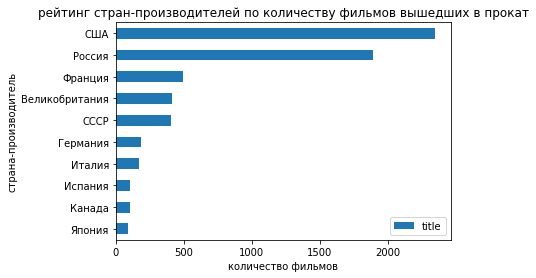

In [62]:
#data_main_country.query('title > 65').plot(kind='bar')
data_main_country.sort_values(by='title',ascending=True).query('title > 65').plot(kind='barh')

plt.title('рейтинг стран-производителей по количеству фильмов вышедших в прокат')
plt.xlabel('количество фильмов')
plt.ylabel('страна-производитель')
plt.show()

главными поставщиками фильмов в прокате с большим отрывом являбтся США и Россия с количеством фильмов 2347 и 1890 соответственно

In [63]:
#для анализа отбираем только фильмы начиная с 2014, т.к. по более ранним фильмам нет данных о кассовых сборах
data_main_country_box_office = data.query('year > 2013').query('box_office > 0')
data_main_country_box_office = data_main_country_box_office.pivot_table(index='main_country', values='box_office', aggfunc = ('sum', 'mean'))
#data_main_country_box_office['mean'] = (data_main_country_box_office['mean']).round(0)
#data_main_country_box_office['sum'] = (data_main_country_box_office['sum'].round(0)

data_main_country_box_office = data_main_country_box_office.sort_values('mean', ascending=False).head(10)
print(data_main_country_box_office)

#data_main_country_box_office.query('mean > 8997755').sort_values('mean', ascending=True).plot(y = 'mean', kind='barh')


                  mean        sum
main_country                     
США            221.748 170746.000
Россия         117.071  52448.000
ОАЭ             60.000     60.000
Бразилия        57.857    405.000
Бельгия         50.000    450.000
КНР             45.083   1623.000
Великобритания  44.524   6367.000
Сингапур        36.000     36.000
Чили            27.000     27.000
Южная Корея     26.875    215.000


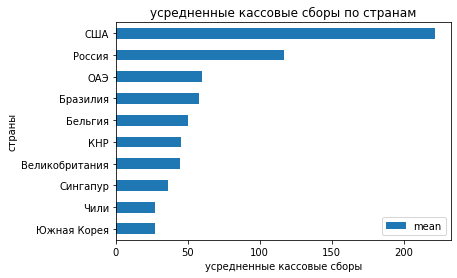

In [64]:
data_main_country_box_office.sort_values('mean', ascending=True).plot(y = 'mean', kind='barh')
plt.title('усредненные кассовые сборы по странам')
plt.xlabel('усредненные кассовые сборы')
plt.ylabel('страны')
plt.show()

по усредненным показателям кассовых сборов наибольшая величина у США с показателем 170746 млн, Россия на 2м месте с показателем 54448 млн, далее идут ОАЭ, Бразилии, КНР

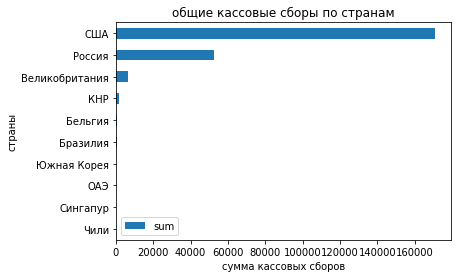

In [65]:
data_main_country_box_office = data_main_country_box_office.sort_values('sum', ascending=False).head(10)
data_main_country_box_office.sort_values('sum', ascending=True).plot(y = 'sum', kind='barh')
plt.title('общие кассовые сборы по странам')
plt.xlabel('сумма кассовых сборов')
plt.ylabel('страны')
plt.show()

по сумам кассовых сборов США также лидируют с значительным отрывом, Россия на 2м месте. На 3м месте Великобритания.

При анализе фльмов в прокате по категории станы производителя лидируют США и Россия как по количеству фильмов в прокате, так и общим и усредненным кассовым сбора. при этом США лидируют с явным отрывом от всех остальных. Здесь может быть и более развитая киноиндустрия, так и качество выходящих фильмов. Производительки фильмов из России также пользутся спросом в прокате, пусть и не так популярны. Тут свою роль могут играть национальные особенности и менталитет близкий большей массе любителей кино.

In [66]:
#созададим 2 новых фрейма с гос.поддержкой и без нее
data_gos = data.query('main_country == "Россия"').query('budget>0')
data_no_gos = data.query('main_country == "Россия"').query('budget == 0')
#data_gos.info()
#data_no_gos.info()


In [67]:
data_1 = data_gos.query('ratings!=0')['ratings'].describe()
data_2 = data_no_gos.query('ratings!=0')['ratings'].describe()
data_ratings_ros = pd.concat([data_1,data_2], axis=1)
data_ratings_ros.columns = ['gos', 'no_gos']
print(data_ratings_ros)

          gos   no_gos
count 314.000 1008.000
mean    6.001    6.145
std     1.124    1.393
min     1.000    1.100
25%     5.300    5.400
50%     6.200    6.350
75%     6.700    7.125
max     8.500    9.200


Фильмы с гос поддержкой: рейтинг имеют 314 фильма из 332, мин.рейтинг 1, максимальный 8,5. Фильмы без гос поддержки имеют куда большую выборку 1008 фильмов из 1558 с минимальным рейтингом 1,1 и максимальным 9,2. Медианные и среднее значения примерно на одном уровне 6,2 и 6,0 с гос.поддержкой и 6,35 и 6,1 без гос поддержки соответственно. Фильмы без гос.поддежрки оцениваются немного выше.

In [68]:
data_3 = data_gos.query('year>=2014')['box_office'].describe()
data_4 = data_no_gos.query('year>=2014')['box_office'].describe()
data_box_office_ros = pd.concat([data_3,data_4], axis=1)
data_box_office_ros.columns = ['gos', 'no_gos']
print(data_box_office_ros)

           gos   no_gos
count  330.000 1109.000
mean   127.545    9.340
std    329.662   71.246
min      0.000    0.000
25%      1.000    0.000
50%     12.000    0.000
75%    103.000    0.000
max   3074.000 1683.000


Возьмем только период начиная с 2014 г, т.к. информация с 2010 по 2013 гг относительно кассовых сборов вызывает сомнения (либо отсутствует либо значения очень малы) Средняя сумма кассовых сборов для фильмов без гос.поддержки начительно ниже такого же показателя у фильмов с гос.поддержкой. Это может быть связано как меньшей популярностью у зрителя и соответственно меньшие кассовые сборы так и вероятноым отсуттвием данных по кассовым сборам в открытых истониках

In [69]:
data_3= data_gos.query('year>=2014').pivot_table(index='year', values=('box_office'), aggfunc = ('count', 'sum'))
data_3.columns = ['count(gos)', 'sum(gos)']
data_4= data_no_gos.query('year>=2014').pivot_table(index='year', values=('box_office'), aggfunc = ('count', 'sum'))
data_4.columns = ['count', 'sum']
data_box_office_ros = pd.concat([data_4,data_3], axis=1)
data_box_office_ros['mean_gos'] = data_box_office_ros['sum(gos)'] / data_box_office_ros['count(gos)']
data_box_office_ros['mean'] = data_box_office_ros['sum'] / data_box_office_ros['count']
data_box_office_ros

,count,sum,count(gos),sum(gos),mean_gos,mean
year,,,,,,
2014,121,809.000,16,1017.000,63.562,6.686
2015,108,1138.000,86,5782.000,67.233,10.537
2016,122,1377.000,61,6079.000,99.656,11.287
2017,88,569.000,41,10863.000,264.951,6.466
2018,423,3577.000,56,9934.000,177.393,8.456
2019,247,2888.000,70,8415.000,120.214,11.692


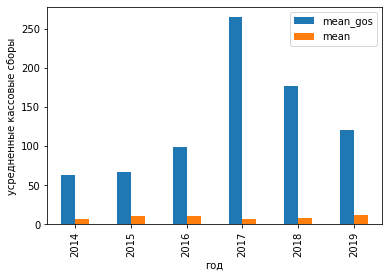

In [70]:
data_box_office_ros.plot(y = ['mean_gos', 'mean'], kind = 'bar')

plt.xlabel('год')
plt.ylabel('усредненные кассовые сборы')
plt.show()

В сводные данные возьмем только период начиная с 2014 г, т.к. информация с 2010 по 2013 гг относительно кассовых сборов вызывает сомнения (либо отсутствует либо значения очень малы) Сводны денные с расчетом среднего показателя сборов на 1 фильм с гос.поддержкой и без показывают, что меньшем количестве филмов с гос.поддержкой в абсолютном выражении, кассовые сборы во всех анализируемых годах выше чем у фильмов без такой поддержки

In [71]:
data_gos_main_director = data_gos.groupby('main_director')[['budget', 'box_office', 'ratings']].mean()
data_gos_main_director['dol_box'] = data_gos_main_director['box_office']/data_gos_main_director['budget']
data_gos_main_director = data_gos_main_director.sort_values('budget', ascending=False).head(10)
data_gos_main_director

,budget,box_office,ratings,dol_box
main_director,,,,
О.Степченко,2305.000,334.000,5.800,0.145
А.Учитель,1033.000,512.000,7.700,0.496
А.Кравчук,980.000,718.000,6.000,0.733
Ф.Бондарчук,944.000,0.000,5.700,0.000
А.Михалков (псевдоним А.Кончаловский),780.000,54.000,6.900,0.069
А.Мизгирев,684.000,364.000,6.600,0.532
Н.Лебедев,635.000,1402.000,7.600,2.208
А.Мегердичев,590.000,2780.000,7.500,4.712
А.Сидоров,564.000,2272.000,6.500,4.028


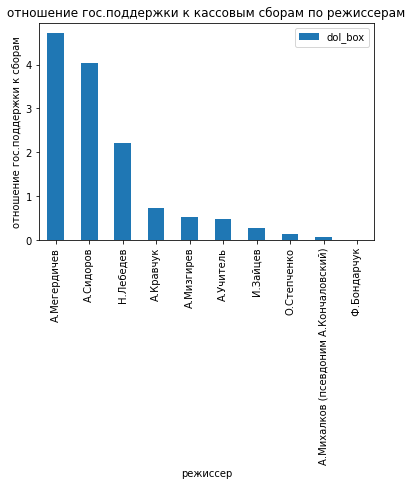

In [72]:
data_gos_main_director.sort_values('dol_box', ascending=False).plot(y = ['dol_box'], kind = 'bar')
plt.title('отношение гос.поддержки к кассовым сборам по режиссерам')
plt.xlabel('режиссер')
plt.ylabel('отношение гос.поддержки к сборам')
plt.show()

In [73]:
data_gos_main_director.describe()

,budget,box_office,ratings,dol_box
count,10.000,10.000,10.000,10.000
mean,901.500,857.400,6.610,1.320
std,527.078,974.584,0.787,1.734
min,500.000,0.000,5.700,0.000
25%,601.250,187.000,5.850,0.178
50%,732.000,438.000,6.550,0.514
75%,971.000,1231.000,7.350,1.839
max,2305.000,2780.000,7.700,4.712


Сопоставив суммы гос.поддержки из первой 10-ки, только 3 режиссера (А.Мегердичев, А.Сидоров, Н.Лебедев) смогли своими фильмами обеспечить кассовые сборы в 4,7, 4,0 и 2,2 раза превышающие гос.поддержку соответственно. Среднее значение рейтинга 6,6 Для сравения среднее значение рейтинга всех получателей гос.поддержки 6,0. Средние кассовые сборы составляют 857,4 млн, против среднего показателя среди всех фильмов с гос.поддержкой 127.5. Явное превышение. В сопоставлении с средними показателями фильмов с гос.поддержкой первая 10ка из этого списка имеет более высокие покзатели

## Общий вывод

В ходе предобработки данных было проведно:
- для объединения масибов mkrf_movies и mkrf_shows значение 'нет' в столбце ['puNumber'] заменено но 0 и преобразуем данные столбца ['puNumber'] в int
- в столбце ['ratings'] показатели приведены к единому формату
- заменены пропуски в категориях film_studio, production_country, producer, genres, director на unknown,  т.к. не возможности установить истинные данне
- явные дубликаты не обнаружены
- в категории ['title'] обнаружены и устранены дубликаты неявные буликаты (фильмы с одинаковыми названиями но разными данными по бюджетам и вохвратной/невозвратной гос.поддержке оставлены)
- устранены невялные дубликаты в категории ['type'] - однинаковые типы но, написанные содержащие лишние пробелы
- для лучшего восприятия переименованы возрастные категории в столбце ['age_restriction']
- в категории ['budget'] пропуски, 0 и значения меньше суммы возвратной и невозвратной гос поддержки заменены по итогу на сумму возвратной и невозвратной гос поддержки т.к. является явным условием для данной категории
- преобразованы данные ['show_start_date'] в формат времени %Y-%m-%dT%H:%M:%S и созданы новый столбец с годом выхода в прокат
- соозданы новые столбцы с основным(главным) жанром и директором фильма
- рассчитана доля фильмов с гос.поддрежкой, которая составляет 46,3 %

Пропуски, явные и неявные дубликаты, отсутствие данных или 0 в значениях мгогут быть как ошибкой при внесении данных со стороны пользователя, так и сбой при выгрузке данных (на пример для категории ['budget'])


Проведен исследовательский анализ данных в ходе которого пулчены следующие результаты 
-  с начала наблюдений 2010г количество вышедших фильмов по годам меняется нелинейно. минимальное количество в 2011 - 488 далее рост до 2014г до уровня 752 фильма с падением в 2015 до 695 фильмов и снова рост в 2016г на уровень 796 фишьмов. В 2017г резкое падение до 499 что близко к минимальному значению 2011г. Далее наблюдается резкий рост и до максимального за наблюдаемый период количество фильмов 900 в 2019г.
- доля вышедших в прокат в кинотеатрах в сопоставлении с общим количеством выпущенных фильмов по годам с начала наблюдения имеет тенденцию к увеличению в (с небольшим снижением в 2016 до 66,1%) достигая своего максимума в 2017г до 71,5% а уже в 2018 доля снижается до 54,1% и 58,9% в 2019. Это может быть связано с изменением каналов получения контента пользователями и перехода в другие форматы отличные от кинотеатров.
- судя по графику кассовых сборов по годам выхода в прокат до 2018 наблюдается рост кассовх сборв, после чего в 2019 небольшое снижение. Максимальная величина становилась на уровне почти 50 000 млн, а минимальное 2,4 млн
- показатель средних сборов по годам показывает рост до 2017г до 136 млн. а далее сниежение
- медианное значени сборов по годам аналогично среднему показывает наибольшую величину в 2017 и далее спад до уровня ниже 2015 с тем отличием что в 2016г был спад от 2015 и потом резкий рост.
- медианное значени сборов по годам аналогично среднему показывает наибольшую величину в 2017 и далее спад до уровня ниже 2015 с тем отличием что в 2016г был спад от 2015 и потом резкий рост.
- в возрастных категориях фильмов наибольшие кассовые сборы в категории 16+, по годам максимальные сборы отмечены в 2018г

Анализ данных в части выборки фильмов с гос поддежркой:
- отсутствют данные о бюджетах и господдержке с 2010-2012гг. - очень малые кассовые сборы в период 2010-2013 при том, что в 2013 средний бюджет несопостовимо больше средних кассовых сборов в этом же году - подозрительно низкий средний ретинг
-для фильмов с гос поддержкой больше 0 процент невозвратной господдержки - общий тренд к снижению с незначительным ростом в 2016 и 2018гг. Процент возвратной гос.поддержки к бюджету расчтет до 2016г и достигает своего максмального значения в 12,2%, а далее наметился тренд к снижению. Наибольшие кассовые сборы наблюдаются в 2017г В этом же году зафиксировано превышение кассовых сборов на бюджетом в 1,6 раза, но далее в таже наблюдается снижение, а в 2019г. вновь кассовые сборы становятся ниже затраченного бюджета. При всем при этом средние показатели рейтинга по всем годам за исключением 2015г составляют 0, что говорит о том что либо фильмы не оценвались либо это может быть связано с ошибкой в данных.
- всего в выборку фильмов с господдержкой вошли 332 фильма из них 79 окупились полностью за счет кассовых сборов
- наибольшее количество профинансированное государством в 2015г - 86 фильмов. По годам количество меняется нелинейно. В среднем наибольшая сумма на фильм была в 2019г. - 182 млн, также большие суммы выделялись в 2017г - 172 млн
-Средняя сумма кассовых сборов наибольшая в 2017г с суммой 265 млн на 1 фильм
-кассовые сборы превышали бюджет фильмов только в 2017 и 2018гг. Во все остальные года фильмы с гос поддержкой не получали достаточных кассовых сборов для покрытия затраченых бюджетов
-наибольшая сумма гос.поддержки была направлена на фильмы в возрастной категории 12+, далее идут категории 6+ и 16+
-наибольшая сумма гос.поддержки была направлена на фильмы категории жанра драма, почти в 2 раза меньше направлялось на комедии и мультфильмы
-в 10-ку фильмов окупившихся в прокате (х4,7 и болше) вошли художественные фильмы, приемущественно комедийного жанра, вышедшие в прокат в период 2014-2019гг. Холоп, Лёд, Я худею, Гуляй, Вася !, Дуxless 2, Самый Лучший День, 8 новых свиданий, Ёлки Новые, Непрощенный, Движение вверх.
- всего 29 фильмов с рейтингом больше 0. 2 из них имеют данные о финансировании от Мин.Культуры. Остальные без инф о бюджетах. В целом получается, что выборка фильмов с рейтингом не является репрезентативной ввиду малого размера

- фильмы с гос поддержкой: рейтинг имеют 314 фильма из 332, мин.рейтинг 1, максимальный 8,5. Фильмы без гос поддержки имеют куда большую выборку 1008 фильмов из 1558 с минимальным рейтингом 1,1 и максимальным 9,2. Медианные и среднее значения примерно на одном уровне 6,2 и 6,0 с гос.поддержкой и 6,35 и 6,1 без гос поддержки соответственно. Фильмы без гос.поддежрки оцениваются немного выше.
- средняя сумма кассовых сборов для фильмов без гос.поддержки начительно ниже такого же показателя у фильмов с гос.поддержкой. Это может быть связано как меньшей популярностью у зрителя и соответственно меньшие кассовые сборы так и вероятноым отсуттвием данных по кассовым сборам в открытых истониках
- Сопоставив суммы гос.поддержки из первой 10-ки, только 3 режиссера (А.Мегердичев, А.Сидоров, Н.Лебедев) смогли своими фильмами обеспечить кассовые сборы в 4,7, 4,0 и 2,2 раза превышающие гос.поддержку соответственно. Среднее значение рейтинга 6,6 Для сравения среднее значение рейтинга всех получателей гос.поддержки 6,0. Средние кассовые сборы составляют 857,4 млн, против среднего показателя среди всех фильмов с гос.поддержкой 127.5. Явное превышение. В сопоставлении с средними показателями фильмов с гос.поддержкой первая 10ка из этого списка имеет более высокие покзатели

При анализе фльмов в прокате по категории станы производителя лидируют США и Россия как по количеству фильмов в прокате, так и общим и усредненным кассовым сбора. при этом США лидируют с явным отрывом от всех остальных. Здесь может быть и более развитая киноиндустрия, так и качество выходящих фильмов. Производительки фильмов из России также пользутся спросом в прокате, пусть и не так популярны. Тут свою роль могут играть национальные особенности и менталитет близкий большей массе любителей кино.